****PROJECT 2- Customer Segmentation****

In [6]:
import pandas as pd         # For data manipulation and analysis
import numpy as np          # For numerical operations


In [8]:
df = pd.read_csv(r'C:\Users\prati\Desktop\DataProjects\Online_Retail.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoiceno    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
df['CustomerID'] = df['CustomerID'].astype(str)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoiceno    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


***Step 1 Data Cleaning***

In [24]:
df.isnull().sum()

Invoiceno         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [28]:
df.duplicated().sum()

5268

In [30]:
df = df.drop_duplicates()

In [32]:
df.duplicated().sum()

0

In [34]:
df.isnull().sum()

Invoiceno         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [36]:
df = df.dropna(subset=['Description'])

In [38]:
df.isnull().sum()

Invoiceno      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Data Inconsistency**

In [41]:
invalid_quantity = df[df['Quantity'] <= 0]
print("Rows with invalid Quantity:")
print(invalid_quantity)

Rows with invalid Quantity:
       Invoiceno StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice CustomerID         Country  
141    2010-12-0

In [43]:
df_purchases = df[df['Quantity'] > 0]
df_returns = df[df['Quantity'] <=0]

In [47]:
invalid_price = df_purchases[df_purchases['UnitPrice'] <=0]
print("Row with invalid Price:")
print(invalid_price)

Row with invalid Price:
       Invoiceno StockCode                       Description  Quantity  \
6391      536941     22734                            amazon        20   
6392      536942     22139                            amazon        15   
9302      537197     22841      ROUND CAKE TIN VINTAGE GREEN         1   
14335     537534     85064      CREAM SWEETHEART LETTER RACK         1   
14336     537534     84832  ZINC WILLIE WINKIE  CANDLE STICK         1   
...          ...       ...                               ...       ...   
524622    580609     22927                            Amazon         1   
535325    581202     23404                             check        41   
535334    581211     22142                             check        14   
538504    581406    46000M      POLYESTER FILLER PAD 45x45cm       240   
538505    581406    46000S      POLYESTER FILLER PAD 40x40cm       300   

               InvoiceDate  UnitPrice CustomerID         Country  
6391   2010-12-03 12

In [49]:
invalid_price = df_returns[df_returns['UnitPrice'] <=0]
print("Row with invalid Price:")
print(invalid_price)

Row with invalid Price:
       Invoiceno StockCode Description  Quantity         InvoiceDate  \
7313      537032     21275           ?       -30 2010-12-03 16:50:00   
13217     537425    84968F       check       -20 2010-12-06 15:35:00   
13218     537426    84968E       check       -35 2010-12-06 15:36:00   
13264     537432    35833G     damages       -43 2010-12-06 16:10:00   
21338     538072     22423      faulty       -13 2010-12-09 14:10:00   
...          ...       ...         ...       ...                 ...   
535333    581210     23395       check       -26 2011-12-07 18:36:00   
535335    581212     22578        lost     -1050 2011-12-07 18:38:00   
535336    581213     22576       check       -30 2011-12-07 18:38:00   
536908    581226     23090     missing      -338 2011-12-08 09:56:00   
538919    581422     23169     smashed      -235 2011-12-08 15:24:00   

        UnitPrice CustomerID         Country  
7313          0.0        nan  United Kingdom  
13217         0.0

In [51]:
df_purchases = df_purchases[df_purchases['UnitPrice'] > 0]

In [53]:
df_purchases

,Invoiceno,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [55]:
## Unique Values
print(df_purchases['Country'].unique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Bahrain' 'Israel' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


**Customer Aggregation**

In [70]:
df_purchases['Total_Price'] = df_purchases['Quantity']* df_purchases['UnitPrice']

df_customer = df_purchases.groupby('CustomerID').agg({
    'Total_Price':'sum',
    'Invoiceno' :pd.Series.nunique,
    'InvoiceDate':'max'
}).reset_index()

df_customer = df_customer.rename(columns={
    'Total_Price':'Total_spent',
    'Invoiceno' :'NumInvoice',
    'InvoiceDate':'LastPurchase'
})

In [72]:
df_customer

,CustomerID,Total_spent,NumInvoice,LastPurchase
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1797.24,4,2011-09-25 13:13:00
3,12349.0,1757.55,1,2011-11-21 09:51:00
4,12350.0,334.40,1,2011-02-02 16:01:00
...,...,...,...,...
4334,18281.0,80.82,1,2011-06-12 10:53:00
4335,18282.0,178.05,2,2011-12-02 11:43:00
4336,18283.0,2045.53,16,2011-12-06 12:02:00
4337,18287.0,1837.28,3,2011-10-28 09:29:00


***Step 2 Feature Engineering: Create new features from the data, such as customer lifetime value, average order value, or frequency of purchase.***

In [77]:
## Create CLV,AOV,FREQUENCY

### CLV is customer Total Spent
df_customer['CLV'] = df_customer['Total_spent']

### AOV is [Total Spent]/[NumInvoice]
df_customer['AOV'] = df_customer['Total_spent']/df_customer['NumInvoice']

### Frequency is no of invoice
df_customer['Frequency'] = df_customer['NumInvoice']



In [81]:
df_customer

,CustomerID,Total_spent,NumInvoice,LastPurchase,CLV,AOV,Frequency
0,12346.0,77183.60,1,2011-01-18 10:01:00,77183.60,77183.600000,1
1,12347.0,4310.00,7,2011-12-07 15:52:00,4310.00,615.714286,7
2,12348.0,1797.24,4,2011-09-25 13:13:00,1797.24,449.310000,4
3,12349.0,1757.55,1,2011-11-21 09:51:00,1757.55,1757.550000,1
4,12350.0,334.40,1,2011-02-02 16:01:00,334.40,334.400000,1
...,...,...,...,...,...,...,...
4334,18281.0,80.82,1,2011-06-12 10:53:00,80.82,80.820000,1
4335,18282.0,178.05,2,2011-12-02 11:43:00,178.05,89.025000,2
4336,18283.0,2045.53,16,2011-12-06 12:02:00,2045.53,127.845625,16
4337,18287.0,1837.28,3,2011-10-28 09:29:00,1837.28,612.426667,3


***Step 3 - Customer Segmentation: Use K-Means clustering or another clustering technique to segment customers into different groups
(e.g., high-value, low-value, frequent buyers).***

                  CLV           AOV    Frequency
Cluster                                         
0        1.992978e+03    380.610551     4.273293
1        1.754902e+06   1228.922906  1428.000000
2        1.228281e+05  80709.925000     1.500000


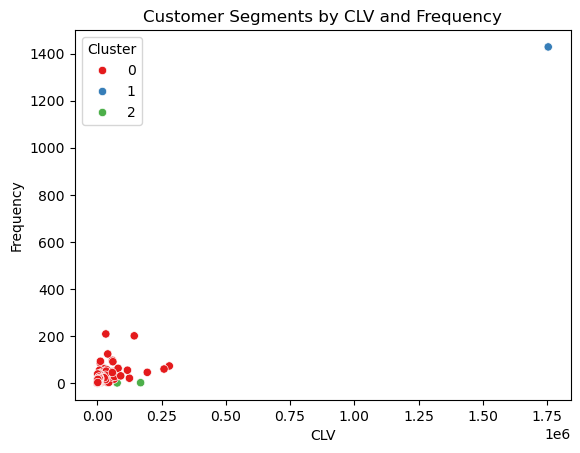

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
X = df_customer[['CLV', 'AOV', 'Frequency']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_customer['Cluster'] = kmeans.fit_predict(X_scaled)

# Explore the clusters
# Group by 'Cluster' and compute mean for selected numeric columns only
print(df_customer.groupby('Cluster')[['CLV', 'AOV', 'Frequency']].mean())


# Visualize the clusters
sns.scatterplot(x='CLV', y='Frequency', hue='Cluster', data=df_customer, palette='Set1')
plt.title('Customer Segments by CLV and Frequency')
plt.show()


In [105]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_customer[['AOV', 'Frequency']]   # Input features
y = df_customer['CLV']                 # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
from sklearn.tree import DecisionTreeRegressor

# Create the model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [109]:
# Predict on the test set
y_pred = model.predict(X_test)


In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 2200.6132131336403
Mean Squared Error: 3239695884.8906054
R² Score: 0.09711152125168576


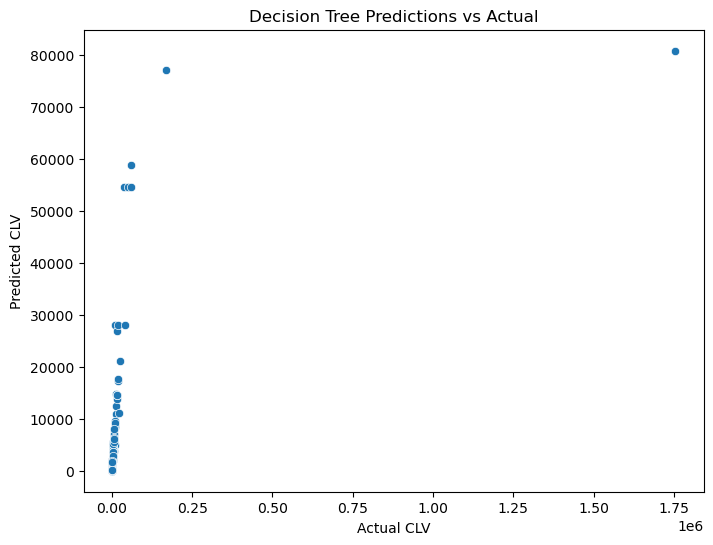

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Decision Tree Predictions vs Actual')
plt.show()


In [115]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.8007888920798419
